In [ ]:
# taken from https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [1]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X.shape, set(y)

((150, 4), {0, 1, 2})

In [3]:
X_2d = X[:, :2] #use only first two features
X_2d = X_2d[y > 0]  # use only classes 1,2
y_2d = y[y > 0]
y_2d -= 1  #and call them 0,1

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

In [5]:
C_2d_range = [.01, 1, 100]
gamma_2d_range = [.1, 1, 10]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

In [6]:
from matplotlib.colors import LinearSegmentedColormap
cwlist = [plt.cm.coolwarm(0.),  plt.cm.coolwarm(.25), (1,1,1,1),
                       plt.cm.coolwarm(.75), plt.cm.coolwarm(1.)]
my_coolwarm = LinearSegmentedColormap.from_list('cw', cwlist)

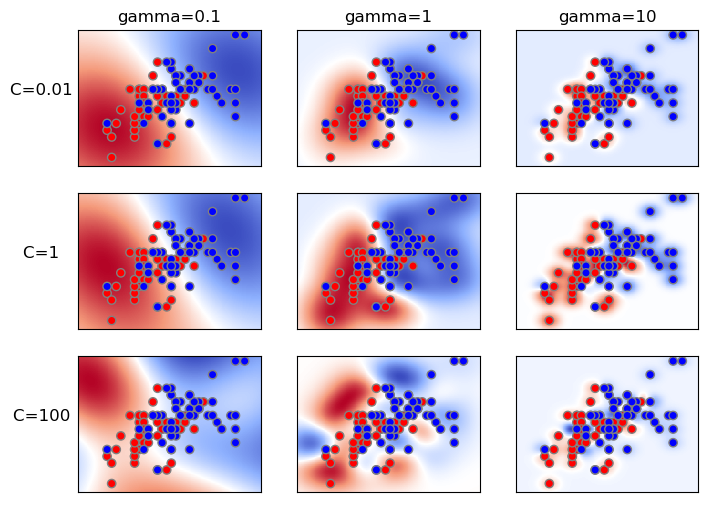

In [7]:
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    if k < len(gamma_2d_range): plt.title(f'gamma={gamma}')
    if k%len(gamma_2d_range) == 0: plt.ylabel(f'C={C}' +' '*12, rotation=0, fontsize=12)

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=my_coolwarm)
    plt.scatter(*X_2d.T, c=np.array(['r','b'])[y_2d], edgecolors="gray")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

In [10]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


In [8]:
# to get the colorbar to be more informative
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

Text(0.5, 1.0, 'Validation accuracy')

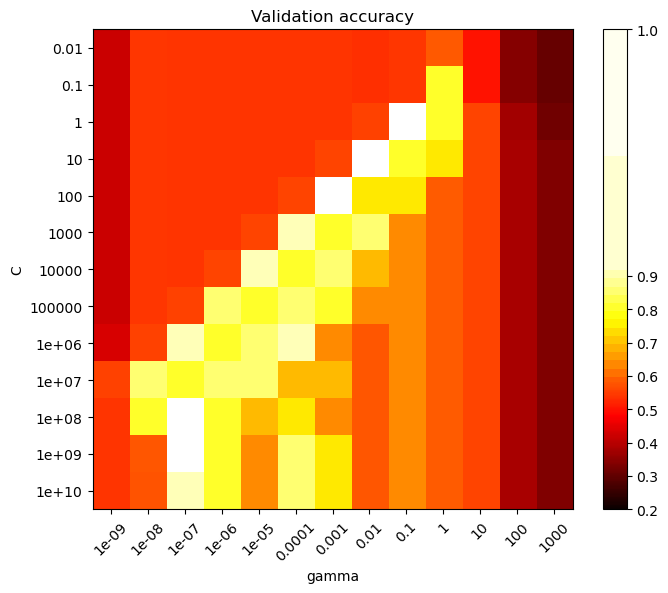

In [11]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), [f'{x:g}' for x in gamma_range], rotation=45)
plt.yticks(np.arange(len(C_range)), [f'{x:g}' for x in C_range])
plt.title("Validation accuracy")